<a href="https://colab.research.google.com/github/bearhz/pytorch_basic/blob/master/06_ipynb%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 线性回归
线性回归：已知数据，找出线性规律。

## 准备工作：加载中文
matplotlib默认不支持中文，想要显示中文，需要添加中文字体。

In [3]:
# 下载中文字体
!pip install wget
import wget
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8fb43287efbe6a0d4950af0fafa25f482513e85a837cd31c111a1473e3bac8ac
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-12-25 06:03:33--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘chinese.simhei.ttf’

chinese.simhei.ttf  100%[===================>]   9.58M  21.9MB/s    in 0.4s    

2023-12-25 06:03:34 (21.9 MB/s) - ‘chinese.simhei.ttf’ saved [10050870/10050870]



In [4]:
# 给plt添加中文字体
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/chinese.simhei.ttf')
mpl.rc('font', family='simhei')
plt.rcParams['axes.unicode_minus'] = False

## 1. 制作有噪音的线性假数据
- 通过为函数添加噪音，可以生成有噪音的假数据

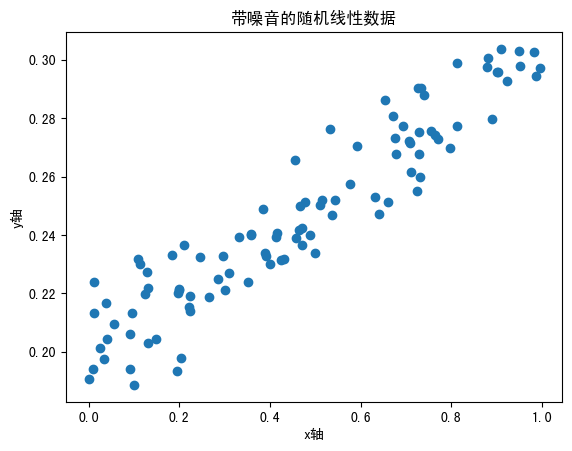

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch

X_data = np.random.rand(100)
noise = np.random.normal(0,0.01, X_data.shape)
Y_data = 0.1 * X_data + 0.2 + noise

plt.scatter(X_data, Y_data)
plt.title("带噪音的随机线性数据")
plt.xlabel("x轴")
plt.ylabel("y轴")
plt.show()

## 2. 编辑数据
- 编辑数据，使其可以被pytorch使用
- 数据必须大于等于2维，数据的形状最外层为数据的个数。所以，numpy一维数组的数据要转换成（100,1）的形状，才能被torch正确使用。

In [86]:
import torch

x = torch.tensor(X_data)
y = torch.tensor(Y_data)
print(x.dtype, y.dtype)

# 转换成2维才能表示有100个数据，每个数据只有一个数字，才能带入torch进行训练
x = x.view(-1,1)
y = y.view(-1,1)

torch.float64 torch.float64


## 3. 定义模型
- 定义一个只包括线性网络的简单模型。
- 定义模型时，需要定义__init__和forward函数。其中，__init__函数中定义神经网络的结构，forward函数定义网络的计算过程。

In [54]:
from torch import nn

# 定义模型
class MyLinearRegression(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(MyLinearRegression, self).__init__()

        # 定义神经网络层
        self.fc1 = nn.Linear(input_size, output_size, dtype=torch.float64)

    def forward(self, x):
        # print(x.dtype, self.fc1.weight.dtype)
        # x = x.to(self.fc1.weight.dtype)
        # 定义前向传播逻辑
        x = self.fc1(x)
        return x

## 4. 实例化模型，选择损失函数和优化器
- pytorch提供了大量的损失函数和优化器
- 实例优化器时需要传入模型参数model.parameters()

In [67]:
# 实例化模型
model = MyLinearRegression()
# 定义损失函数
loss_fn = nn.MSELoss()
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

## 5. 训练模型
1. 正向传播，计算y_pred
2. 计算loss
3. 优化器的梯度清零
4. 反向传播，计算梯度
5. 迭代

In [80]:
for i in range(10000):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i % 2000 == 0:
    print(f"{i: 6d}: {loss.item(): .5e}")

     0:  1.12634e-04
  2000:  1.12634e-04
  4000:  1.12634e-04
  6000:  1.12634e-04
  8000:  1.12634e-04


## 6. 画出拟合线
- 使用模型和X数据，计算出y_pred
- 使用plt.scatter和plt.plot画出真实数据和拟合线

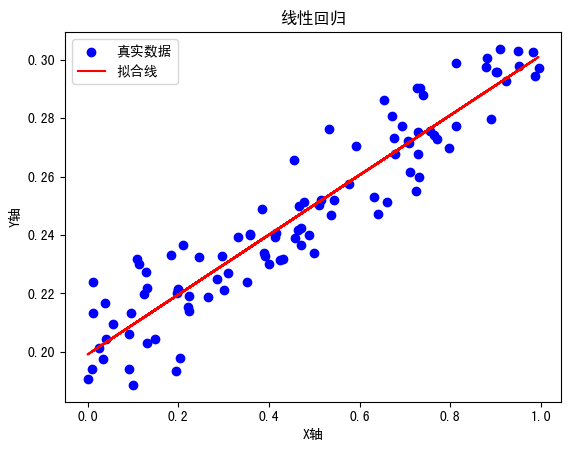

In [107]:
y_pred = model(x)
# print(y_pred)
y_pred.view(1,-1)
y_pred = y_pred.detach().numpy().reshape(-1)
plt.scatter(X_data, Y_data, color='blue', label='真实数据', marker='o')
plt.plot(X_data, y_pred, color='red', label='拟合线')
# 添加X/Y轴标签
plt.xlabel('X轴')
plt.ylabel('Y轴')
# 添加标题
plt.title('线性回归')

# 显示图例
plt.legend()
plt.show()